In [ ]:
pip install rpy2

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri

In [6]:
df_1 = pd.read_csv("finalmerge.csv")

In [ ]:
# Check to see how many unique brand values there are 
unique_brands_sorted = sorted(df_1['BRAND'].unique())
print(unique_brands_sorted)


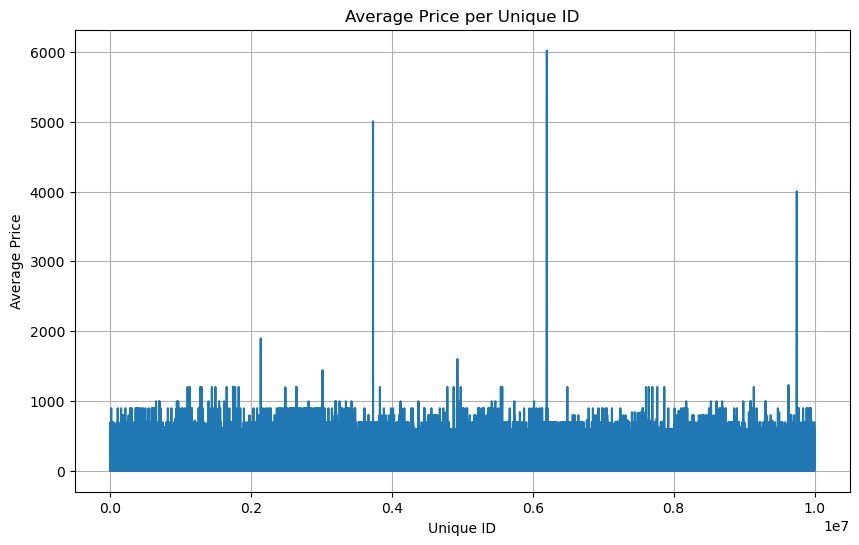

In [3]:
# Find basic statistics for Orgprice so you can determine the price ranges for your brand dummy 
# Group by 'unique_id' and calculate the mean price for each group
grouped_data = df_1.groupby('SKU')['ORGPRICE'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['SKU'], grouped_data['ORGPRICE'], linestyle='-')
plt.title('Average Price per Unique ID')
plt.xlabel('Unique ID')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

In [ ]:
df_1['ORGPRICE'].describe()

In [7]:
# Calculate quartile values for 'price'
q25 = df_1['ORGPRICE'].quantile(0.25)
q75 = df_1['ORGPRICE'].quantile(0.75)


In [8]:
# Create a new column 'price_category' based on quartiles
df_1['BRAND_dummy'] = pd.cut(df_1['ORGPRICE'],
                              bins=[-float('inf'), q25, q75, float('inf')],
                              labels=['Cheap', 'Affordable', 'Luxury'])

In [9]:
# Create dummy variables for 'price_category'
dummy_df = pd.get_dummies(df_1['BRAND_dummy'], prefix='BRAND_dummy')

# Concatenate the dummy variables with the original DataFrame
df_1 = pd.concat([df_1, dummy_df], axis=1)

In [10]:
df_1.head()

,Unnamed: 0,SKU,STYPE,STORE,ORGPRICE,QUANTITY,SALEDATE,AMT,BRAND,DEPT,RETAIL,CITY,STATE,COUNTY,BRAND_dummy,BRAND_dummy_Cheap,BRAND_dummy_Affordable,BRAND_dummy_Luxury
0,0,3,P,202,30.0,1,2005-01-18,0.0,TURNBURY,6505,440.0,TAMPA,FL,Hillsborough County,Affordable,0,1,0
1,1,3,R,202,30.0,1,2005-01-29,0.0,TURNBURY,6505,440.0,TAMPA,FL,Hillsborough County,Affordable,0,1,0
2,2,450,P,202,6.0,1,2005-07-10,6.0,INTERNAT,1202,3.0,TAMPA,FL,Hillsborough County,Cheap,1,0,0
3,3,450,P,202,6.0,1,2005-06-06,6.0,INTERNAT,1202,3.0,TAMPA,FL,Hillsborough County,Cheap,1,0,0
4,4,450,P,202,6.0,1,2005-07-29,6.0,INTERNAT,1202,3.0,TAMPA,FL,Hillsborough County,Cheap,1,0,0


In [ ]:
# Plot histogram
plt.hist([df_1[df_1['BRAND_dummy_Cheap'] == 1]['ORGPRICE'],
          df_1[df_1['BRAND_dummy_Affordable'] == 1]['ORGPRICE'],
          df_1[df_1['BRAND_dummy_Luxury'] == 1]['ORGPRICE']],
         bins=20, alpha=0.7, label=['Cheap', 'Affordable', 'Luxury'])

plt.xlabel('ORGPRICE')  # Change xlabel to ORGPRICE
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Distribution of Brand Categories based on ORGPRICE')  # Change title to ORGPRICE
plt.xlim(0, 600)
plt.show()

In [11]:
# Identify observations with prices above 450$
high_price_obs = df_1[df_1['ORGPRICE'] >= 450]

# Print the DataFrame with high prices
print("Observations with Prices Above 450$")
print(high_price_obs)

Observations with Prices Above 450$
          Unnamed: 0      SKU STYPE  STORE  ORGPRICE  QUANTITY    SALEDATE  \
2564            2564   129814     R    202     595.0         1  2005-03-14   
2565            2565   129814     P    202     595.0         1  2005-02-23   
2566            2566   129814     P    202     595.0         1  2005-06-06   
2857            2857   149814     P    202     595.0         1  2005-04-15   
3551            3551   183444     P    202     625.0         1  2005-08-13   
...              ...      ...   ...    ...       ...       ...         ...   
65821853    65821853  9747774     P   1609    4004.0         1  2005-08-15   
65821854    65821854  9747774     P   1609    4004.0         1  2005-08-15   
65821855    65821855  9747774     P   1609    4004.0         1  2005-05-29   
65821856    65821856  9747774     P   1609    4004.0         1  2005-03-29   
65821857    65821857  9747774     P   1609    4004.0         1  2005-03-29   

            AMT      BRAND 

### We discovered a few outliears so we decided to drop all products that have a price greater than 1000

In [12]:
# Remove rows with ORGPRICE > 1000
df_1 = df_1[df_1['ORGPRICE'] <= 1000].reset_index(drop=True)

In [ ]:
# Check for duplicate rows based on all columns
duplicate_rows = df_1[df_1.duplicated()]
duplicate_rows

In [ ]:
# Check for any duplicate rows
has_duplicates = df_1.duplicated().any()

In [ ]:
# We observe no duplicate rows
has_duplicates

In [13]:
# Create dummy variable for 'style' where 1 corresponds to 'R' and 0 otherwise
df_1['Returns'] = df_1['STYPE'].apply(lambda x: 1 if x == 'R' else 0)

In [14]:
df_1.head()

,Unnamed: 0,SKU,STYPE,STORE,ORGPRICE,QUANTITY,SALEDATE,AMT,BRAND,DEPT,RETAIL,CITY,STATE,COUNTY,BRAND_dummy,BRAND_dummy_Cheap,BRAND_dummy_Affordable,BRAND_dummy_Luxury,Returns
0,0,3,P,202,30.0,1,2005-01-18,0.0,TURNBURY,6505,440.0,TAMPA,FL,Hillsborough County,Affordable,0,1,0,0
1,1,3,R,202,30.0,1,2005-01-29,0.0,TURNBURY,6505,440.0,TAMPA,FL,Hillsborough County,Affordable,0,1,0,1
2,2,450,P,202,6.0,1,2005-07-10,6.0,INTERNAT,1202,3.0,TAMPA,FL,Hillsborough County,Cheap,1,0,0,0
3,3,450,P,202,6.0,1,2005-06-06,6.0,INTERNAT,1202,3.0,TAMPA,FL,Hillsborough County,Cheap,1,0,0,0
4,4,450,P,202,6.0,1,2005-07-29,6.0,INTERNAT,1202,3.0,TAMPA,FL,Hillsborough County,Cheap,1,0,0,0


In [15]:
df_1[df_1['QUANTITY']>1]

,Unnamed: 0,SKU,STYPE,STORE,ORGPRICE,QUANTITY,SALEDATE,AMT,BRAND,DEPT,RETAIL,CITY,STATE,COUNTY,BRAND_dummy,BRAND_dummy_Cheap,BRAND_dummy_Affordable,BRAND_dummy_Luxury,Returns
26594436,26596291,374402,R,6404,32.5,40,2004-11-02,32.5,TOMMY HI,1704,16.25,COLUMBIA,SC,Lexington County,Affordable,0,1,0,1
50269010,50272662,5937725,R,8404,34.0,80,2005-03-22,34.0,CAROLE H,3102,17.00,TULSA,OK,Tulsa County,Affordable,0,1,0,1
56397328,56401432,6159778,R,2807,38.0,43,2005-08-24,38.0,KAREN KA,5301,9.50,HARLINGEN,TX,Cameron County,Affordable,0,1,0,1
59275224,59279558,4496370,R,4003,89.5,90,2005-07-29,89.5,POLO FAS,4505,22.37,WEST DES MOINES,IA,Polk County,Luxury,0,0,1,1


### Data Modeling 

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
df_1.corr()

In [12]:
features = ['Returns', 
            'ORGPRICE',
            'BRAND_dummy_Cheap',
            'BRAND_dummy_Affordable',
            'BRAND_dummy_Luxury', 
            'QUANTITY', 
            'DEPT',
            'RETAIL']

In [ ]:
heat_map = sns.set(style = "darkgrid") 

f,ax = plt.subplots(figsize=(8, 8))

sns.heatmap(df_1[features].corr(), cmap=heat_map, annot=True)

f.tight_layout()

In [ ]:
df_1.shape

In [ ]:


df_1['SALEDATE'] 

In [17]:

df_1['SALEDATE'] = pd.to_datetime(df_1['SALEDATE'])  # Convert 'saledate' to datetime format

# Function to extract month
def extract_month(date):
    return date.strftime('%B')

# Create a new column 'salemonth' to store the extracted month
df_1['Salemonth'] = df_1['SALEDATE'].apply(extract_month)

print(df_1)

          Unnamed: 0      SKU STYPE  STORE  ORGPRICE  QUANTITY   SALEDATE  \
0                  0        3     P    202      30.0         1 2005-01-18   
1                  1        3     R    202      30.0         1 2005-01-29   
2                  2      450     P    202       6.0         1 2005-07-10   
3                  3      450     P    202       6.0         1 2005-06-06   
4                  4      450     P    202       6.0         1 2005-07-29   
...              ...      ...   ...    ...       ...       ...        ...   
65820528    65825299  9999950     P   1609      14.0         1 2005-02-12   
65820529    65825300  9999950     P   1609      14.0         1 2004-10-22   
65820530    65825301  9999950     P   1609      14.0         1 2004-10-11   
65820531    65825302  9999950     P   1609      14.0         1 2005-04-05   
65820532    65825303  9999950     P   1609      14.0         1 2004-10-15   

           AMT      BRAND  DEPT  RETAIL                  CITY STATE  \
0   

In [18]:
df_1['amt_diff']=df_1['AMT']-df_1['ORGPRICE']
df_1['retail_diff']=df_1['RETAIL']-df_1['ORGPRICE']


In [19]:
df_1.head(20)


,Unnamed: 0,SKU,STYPE,STORE,ORGPRICE,QUANTITY,SALEDATE,AMT,BRAND,DEPT,...,STATE,COUNTY,BRAND_dummy,BRAND_dummy_Cheap,BRAND_dummy_Affordable,BRAND_dummy_Luxury,Returns,Salemonth,amt_diff,retail_diff
0,0,3,P,202,30.0,1,2005-01-18,0.0,TURNBURY,6505,...,FL,Hillsborough County,Affordable,0,1,0,0,January,-30.0,410.00
1,1,3,R,202,30.0,1,2005-01-29,0.0,TURNBURY,6505,...,FL,Hillsborough County,Affordable,0,1,0,1,January,-30.0,410.00
2,2,450,P,202,6.0,1,2005-07-10,6.0,INTERNAT,1202,...,FL,Hillsborough County,Cheap,1,0,0,0,July,0.0,-3.00
3,3,450,P,202,6.0,1,2005-06-06,6.0,INTERNAT,1202,...,FL,Hillsborough County,Cheap,1,0,0,0,June,0.0,-3.00
4,4,450,P,202,6.0,1,2005-07-29,6.0,INTERNAT,1202,...,FL,Hillsborough County,Cheap,1,0,0,0,July,0.0,-3.00
5,5,450,P,202,6.0,1,2005-07-23,6.0,INTERNAT,1202,...,FL,Hillsborough County,Cheap,1,0,0,0,July,0.0,-3.00
6,6,450,R,202,6.0,1,2005-07-16,6.0,INTERNAT,1202,...,FL,Hillsborough County,Cheap,1,0,0,1,July,0.0,-3.00
7,7,450,P,202,6.0,1,2005-07-04,6.0,INTERNAT,1202,...,FL,Hillsborough County,Cheap,1,0,0,0,July,0.0,-3.00
8,8,788,P,202,18.0,1,2004-10-18,18.0,BALI/HEN,2102,...,FL,Hillsborough County,Affordable,0,1,0,0,October,0.0,0.00
9,9,1634,P,202,60.0,1,2004-12-29,60.0,ENZO ANG,7106,...,FL,Hillsborough County,Luxury,0,0,1,0,December,0.0,0.00


In [17]:
df_1.columns

Index(['Unnamed: 0', 'SKU', 'STYPE', 'STORE', 'ORGPRICE', 'QUANTITY',
       'SALEDATE', 'AMT', 'BRAND', 'DEPT', 'RETAIL', 'CITY', 'STATE', 'COUNTY',
       'BRAND_dummy', 'BRAND_dummy_Cheap', 'BRAND_dummy_Affordable',
       'BRAND_dummy_Luxury', 'Returns', 'Salemonth', 'amt_diff',
       'retail_diff'],
      dtype='object')

In [20]:
usefulfeature=['BRAND', 'DEPT','CITY', 'STATE', 'COUNTY',
       'BRAND_dummy', 'BRAND_dummy_Cheap', 'BRAND_dummy_Affordable',
       'BRAND_dummy_Luxury', 'Returns', 'Salemonth', 'amt_diff',
       'retail_diff']

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df_1 is your DataFrame and usefulfeature contains the feature names
usefulfeature = ['BRAND', 'DEPT', 'CITY', 'STATE', 'COUNTY',
                'BRAND_dummy', 'BRAND_dummy_Cheap', 'BRAND_dummy_Affordable',
                'BRAND_dummy_Luxury', 'Returns', 'Salemonth', 'amt_diff',
                'retail_diff']

# Subset the DataFrame df_1 with the selected useful features
data_subset = df_1[usefulfeature]

# Add constant if you're fitting a model with an intercept
data_subset_with_const = sm.add_constant(data_subset)

# Create a DataFrame to store VIF results
vif_data_subset = pd.DataFrame()
vif_data_subset["Feature"] = data_subset_with_const.columns

# Calculate VIF for each feature in the subset
vif_data_subset["VIF"] = [variance_inflation_factor(data_subset_with_const.values, i) for i in range(data_subset_with_const.shape[1])]

# Display the VIF data sorted by VIF values
print(vif_data_subset.sort_values(by='VIF', ascending=False))


In [ ]:
filename='df_1'
df_1.to_csv(filename)

In [20]:
X=df_1[usefulfeature]
y=df_1['Returns']

In [ ]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


# Initialize Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Feature selection using the Random Forest as the estimator
feat_selector = SelectFromModel(clf)

# Fit the feature selector to your data
feat_selector.fit(X, y)

# Get selected feature indices
selected_feat_indices = feat_selector.get_support(indices=True)

# Get feature names
selected_feat_names = list(X.columns[selected_feat_indices])  # Replace 'X.columns' if you're not using pandas

# Transform your dataset to include only the selected features
X_selected = feat_selector.transform(X)

print("Selected feature names:", selected_feat_names)
